# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [95]:
#sample data request and indexing into libraries
data = requests.get(url + "&q=Sydney")
data1 = data.json()
data1["coord"]["lat"]

-33.8679

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?" + "appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  f"{url}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cabo san lucas
Processing Record 2 of Set 1 | kerikeri
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | jalna
Processing Record 5 of Set 1 | isafjordur
Processing Record 6 of Set 1 | rehoboth
Processing Record 7 of Set 1 | garissa
Processing Record 8 of Set 1 | port mathurin
Processing Record 9 of Set 1 | lompoc
Processing Record 10 of Set 1 | papatowai
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | tralee
Processing Record 14 of Set 1 | enewetak
Processing Record 15 of Set 1 | haiku-pauwela
Processing Record 16 of Set 1 | invercargill
Processing Record 17 of Set 1 | qamdo
Processing Record 18 of Set 1 | san luis
Processing Record 19 of Set 1 | taiohae
City not found. Skipping...
Processing Record 20 of Set 1 | klaksvik
Processing Record 21 of Set 1 | petropavlovsk-kamchatsky
Processing Record 22 of Se

In [7]:
#checking what city_data is -> a list of dictionaries
city_data

[{'City': 'cabo san lucas',
  'Lat': 22.8909,
  'Lng': -109.9124,
  'Max Temp': 26.45,
  'Humidity': 68,
  'Cloudiness': 67,
  'Wind Speed': 1.79,
  'Country': 'MX',
  'Date': 1709682576},
 {'City': 'kerikeri',
  'Lat': -35.2268,
  'Lng': 173.9474,
  'Max Temp': 21.62,
  'Humidity': 68,
  'Cloudiness': 62,
  'Wind Speed': 0.45,
  'Country': 'NZ',
  'Date': 1709683030},
 {'City': 'avarua',
  'Lat': -21.2078,
  'Lng': -159.775,
  'Max Temp': 29.03,
  'Humidity': 70,
  'Cloudiness': 20,
  'Wind Speed': 5.66,
  'Country': 'CK',
  'Date': 1709682909},
 {'City': 'jalna',
  'Lat': 19.8333,
  'Lng': 75.8833,
  'Max Temp': 21.88,
  'Humidity': 23,
  'Cloudiness': 59,
  'Wind Speed': 3.15,
  'Country': 'IN',
  'Date': 1709683334},
 {'City': 'isafjordur',
  'Lat': 66.0755,
  'Lng': -23.124,
  'Max Temp': 1.88,
  'Humidity': 79,
  'Cloudiness': 100,
  'Wind Speed': 2.91,
  'Country': 'IS',
  'Date': 1709682911},
 {'City': 'rehoboth',
  'Lat': -23.3167,
  'Lng': 17.0833,
  'Max Temp': 18.77,
  'Hum

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cabo san lucas,22.8909,-109.9124,26.45,68,67,1.79,MX,1709682576
1,kerikeri,-35.2268,173.9474,21.62,68,62,0.45,NZ,1709683030
2,avarua,-21.2078,-159.7750,29.03,70,20,5.66,CK,1709682909
3,jalna,19.8333,75.8833,21.88,23,59,3.15,IN,1709683334
4,isafjordur,66.0755,-23.1240,1.88,79,100,2.91,IS,1709682911


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cabo san lucas,22.8909,-109.9124,26.45,68,67,1.79,MX,1709682576
1,kerikeri,-35.2268,173.9474,21.62,68,62,0.45,NZ,1709683030
2,avarua,-21.2078,-159.7750,29.03,70,20,5.66,CK,1709682909
3,jalna,19.8333,75.8833,21.88,23,59,3.15,IN,1709683334
4,isafjordur,66.0755,-23.1240,1.88,79,100,2.91,IS,1709682911


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [33]:
#to double check column names
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cabo san lucas,22.8909,-109.9124,26.45,68,67,1.79,MX,1709682576
1,kerikeri,-35.2268,173.9474,21.62,68,62,0.45,NZ,1709683030
2,avarua,-21.2078,-159.7750,29.03,70,20,5.66,CK,1709682909
3,jalna,19.8333,75.8833,21.88,23,59,3.15,IN,1709683334
4,isafjordur,66.0755,-23.1240,1.88,79,100,2.91,IS,1709682911


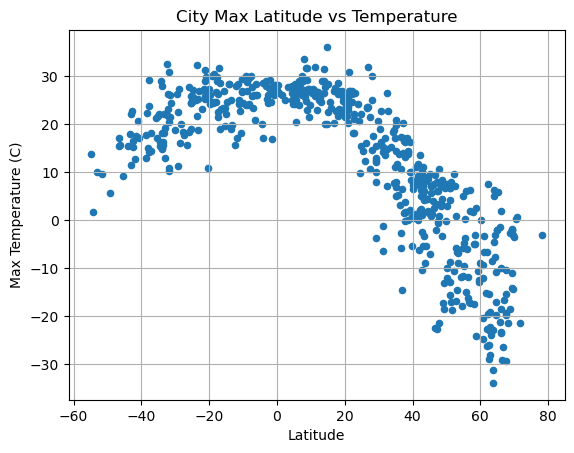

In [31]:
# Build scatter plot for latitude vs. temperature
LatvTemp = city_data_df.plot(
    "Lat",
    "Max Temp",
    kind = "scatter",

# Incorporate the other graph properties
    grid = True,
    xlabel = "Latitude",
    ylabel = "Max Temperature (C)",
    title = "City Max Latitude vs Temperature"
)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
LatvTemp;

#### Latitude Vs. Humidity

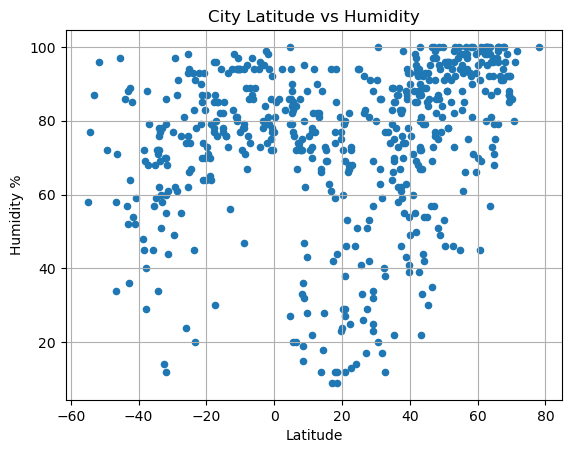

In [39]:
# Build the scatter plots for latitude vs. humidity
LatvHum = city_data_df.plot(
    "Lat",
    "Humidity",
   kind = "scatter",

   # Incorporate the other graph properties
   grid = True,
   xlabel =  "Latitude",
   ylabel = "Humidity %",
   title = "City Latitude vs Humidity"
)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
LatvHum;

#### Latitude Vs. Cloudiness

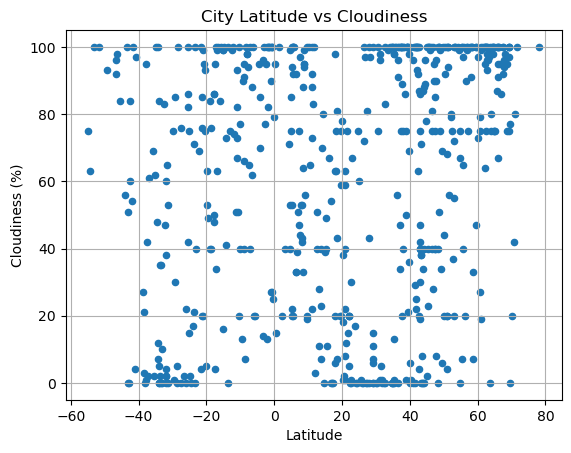

In [41]:
# Build the scatter plots for latitude vs. cloudiness
LatvCloud = city_data_df.plot(
    "Lat",
    "Cloudiness",
    kind = "scatter",

#    # Incorporate the other graph properties
    grid = True,
    xlabel = "Latitude",
    ylabel = "Cloudiness (%)",
    title = "City Latitude vs Cloudiness"
)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
LatvCloud;

#### Latitude vs. Wind Speed Plot

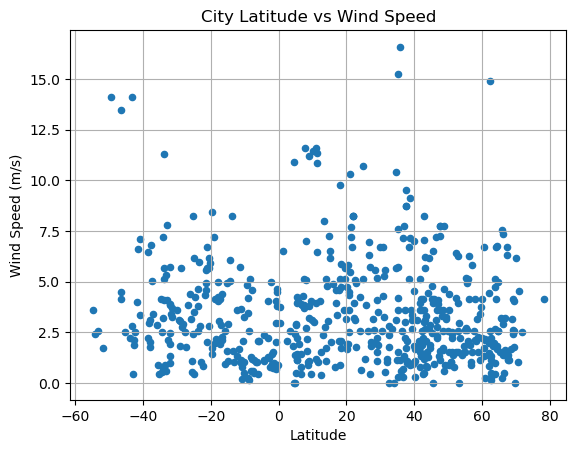

In [43]:
# Build the scatter plots for latitude vs. cloudiness
LatvWind = city_data_df.plot(
    "Lat",
    "Wind Speed",
    kind = "scatter",

    # Incorporate the other graph properties
    grid = "True",
    xlabel = "Latitude",
    ylabel = "Wind Speed (m/s)",
    title = "City Latitude vs Wind Speed"
)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
LatvWind;

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [110]:
# Define a function to create Linear Regression plots
def makeaplot(x,y):
    
    #get lin regress values
    (slope, intercept, rvalue, pvalue, stdev) = linregress(x, y)

    #calculate regress values
    regress_values = slope*x + intercept

    #plot
    print(f"The r-value is: {rvalue}")
    plt.scatter(x, y)
    plt.plot(x, regress_values, "red")
    line_eq = "y = " + str(round(slope, 4)) + "x + " + str(round(intercept, 4))
    plt.annotate(line_eq, (max(x - 10), max(y - 10)),color = "red")
    plt.xlabel("Latitude")


In [65]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cabo san lucas,22.8909,-109.9124,26.45,68,67,1.79,MX,1709682576
3,jalna,19.8333,75.8833,21.88,23,59,3.15,IN,1709683334
4,isafjordur,66.0755,-23.1240,1.88,79,100,2.91,IS,1709682911
8,lompoc,34.6391,-120.4579,18.77,64,0,5.66,US,1709682821
12,tralee,52.2704,-9.7026,9.56,85,80,6.42,IE,1709682989


In [66]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kerikeri,-35.2268,173.9474,21.62,68,62,0.45,NZ,1709683030
2,avarua,-21.2078,-159.7750,29.03,70,20,5.66,CK,1709682909
5,rehoboth,-23.3167,17.0833,18.77,20,0,2.83,NaN,1709682943
6,garissa,-0.4536,39.6401,27.48,72,25,4.47,KE,1709683335
7,port mathurin,-19.6833,63.4167,25.99,73,63,8.43,MU,1709682907


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8716121450701447


Text(0, 0.5, 'Max Temp')

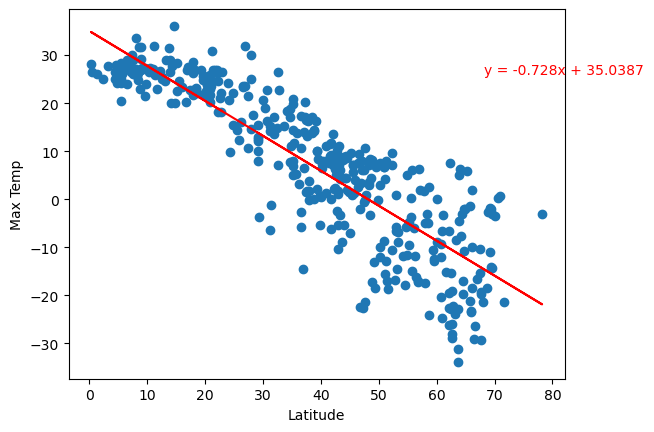

In [111]:
# Linear regression on Northern Hemisphere
north_x = northern_hemi_df["Lat"]
north_y = northern_hemi_df["Max Temp"]

makeaplot(north_x, north_y)

plt.ylabel("Max Temp")

The r-value is: 0.6235246886446382


Text(0, 0.5, 'Max Temp')

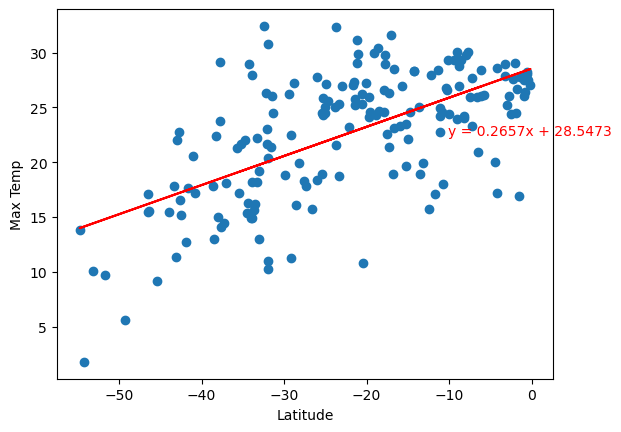

In [112]:
# Linear regression on Southern Hemisphere
south_x = southern_hemi_df["Lat"]
south_y = southern_hemi_df["Max Temp"]

makeaplot(south_x, south_y)

plt.ylabel("Max Temp")

**Discussion about the linear relationship:** 

Based upon the sample data, the rate of change in temperature in the northern hemisphere (as of March 2024) is much higher than the rate of change in the southern hemisphere. There is a major difference here which is statistically significant.

However, when looking at their r values, both absolute value r are >0.5. 
The north, having |r| = 0.872 suggests there is a strong correlation between latitude and temperature.
The south, having |r| = 0.624 suggests there is a moderate correlation between latitude and temperature. 

Both hemispheres suggest that latitude does have an effect on temperature. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.42095532016084247


Text(0, 0.5, 'Humidity')

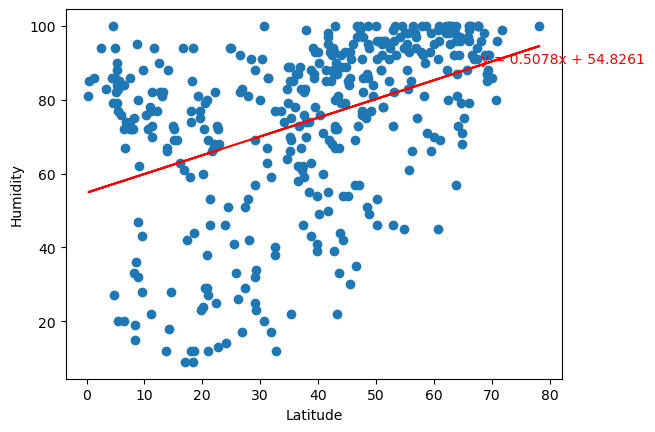

In [115]:
# Northern Hemisphere and humidity
north_x = northern_hemi_df["Lat"]
north_y = northern_hemi_df["Humidity"]

makeaplot(north_x, north_y)

plt.ylabel("Humidity")

The r-value is: 0.40795969109689223


Text(0, 0.5, 'Humidity')

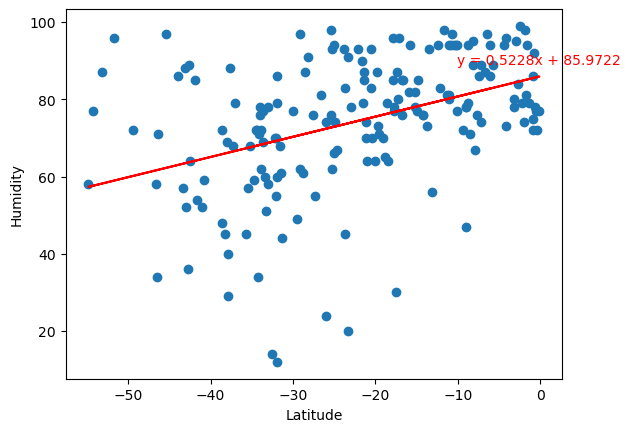

In [116]:
# Southern hemisphere and humidity
south_x = southern_hemi_df["Lat"]
south_y = southern_hemi_df["Humidity"]

makeaplot(south_x, south_y)

plt.ylabel("Humidity")

**Discussion about the linear relationship:** 

Based upon the sample data, the rate of change in humidity in the northern and southern hemispheres are close to each other, 0.5 and 0.52 respectively. 

When looking at their r values, both absolute value r are <0.5 which suggests a weak correlation. 

Both suggest that there is a weak correlation between humidity and latitude. This could be because other factors such as climate, proximity to water, and biome affect humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.29489496693723255


Text(0, 0.5, 'Cloudiness')

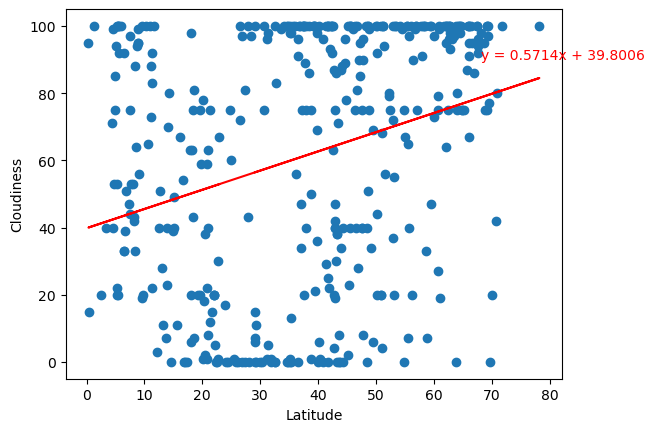

In [117]:
# Northern Hemisphere
north_x = northern_hemi_df["Lat"]
north_y = northern_hemi_df["Cloudiness"]

makeaplot(north_x, north_y)

plt.ylabel("Cloudiness")

The r-value is: 0.23861390685556538


Text(0, 0.5, 'Cloudiness')

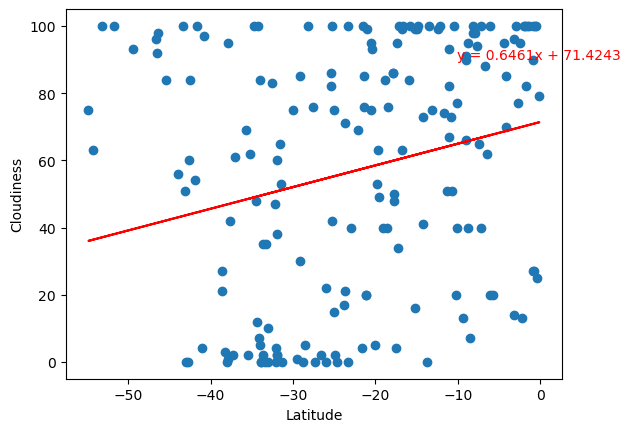

In [118]:
# Southern Hemisphere
south_x = southern_hemi_df["Lat"]
south_y = southern_hemi_df["Cloudiness"]

makeaplot(south_x, south_y)

plt.ylabel("Cloudiness")

**Discussion about the linear relationship:** 

Based upon the sample data, the rate of change in cloudiness suggest the southern hemisphere has a slightly larger rate of change than the northern hemisphere. 0.57 versus 0.65 or about 0.08 difference. There isn't a major difference. 

When analyzing their r values, both absolute value r are <0.3, which suggests none or at most a very weak correlation.

Both hemispheres suggest there is little to no correlation between cloudiness and latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.15613318379822086


Text(0, 0.5, 'Wind Speed')

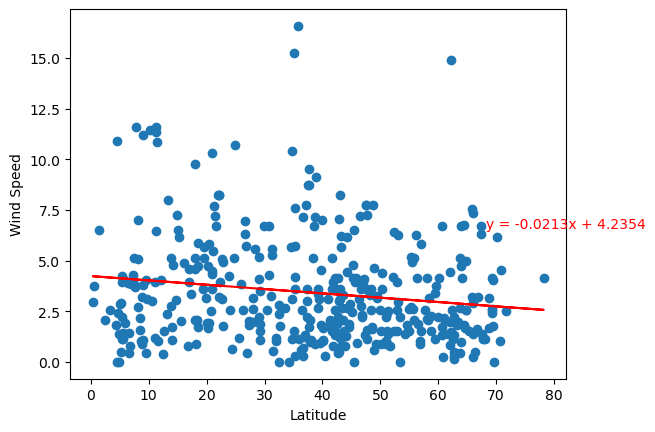

In [119]:
# Northern Hemisphere
north_x = northern_hemi_df["Lat"]
north_y = northern_hemi_df["Wind Speed"]

makeaplot(north_x, north_y)

plt.ylabel("Wind Speed")

The r-value is: -0.3065107484654881


Text(0, 0.5, 'Wind Speed')

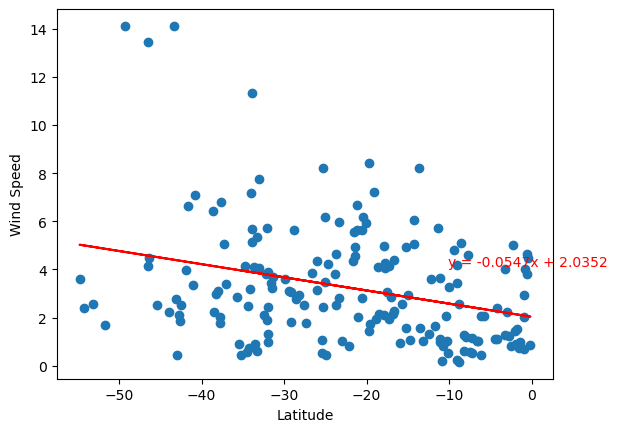

In [120]:
# Southern Hemisphere
south_x = southern_hemi_df["Lat"]
south_y = southern_hemi_df["Wind Speed"]

makeaplot(south_x, south_y)

plt.ylabel("Wind Speed")

**Discussion about the linear relationship:** 

Based upon the sample data, the rate of change for both hemispheres is very small. However, both do show a negative correlation suggesting wind speed slows down slightly as latitude trends towards zero. 

The northern hemisphere's r-value is <0.3 suggesting little to no correlation between latitude and wind speed. 
The southern hemisphere's r-value i <0.5 suggesting a weak correlation between latitude and wind speed. 

Both hemispheres suggest there is a very weak correlation between wind speed and latitude. 